# Life Expectancy and GDP

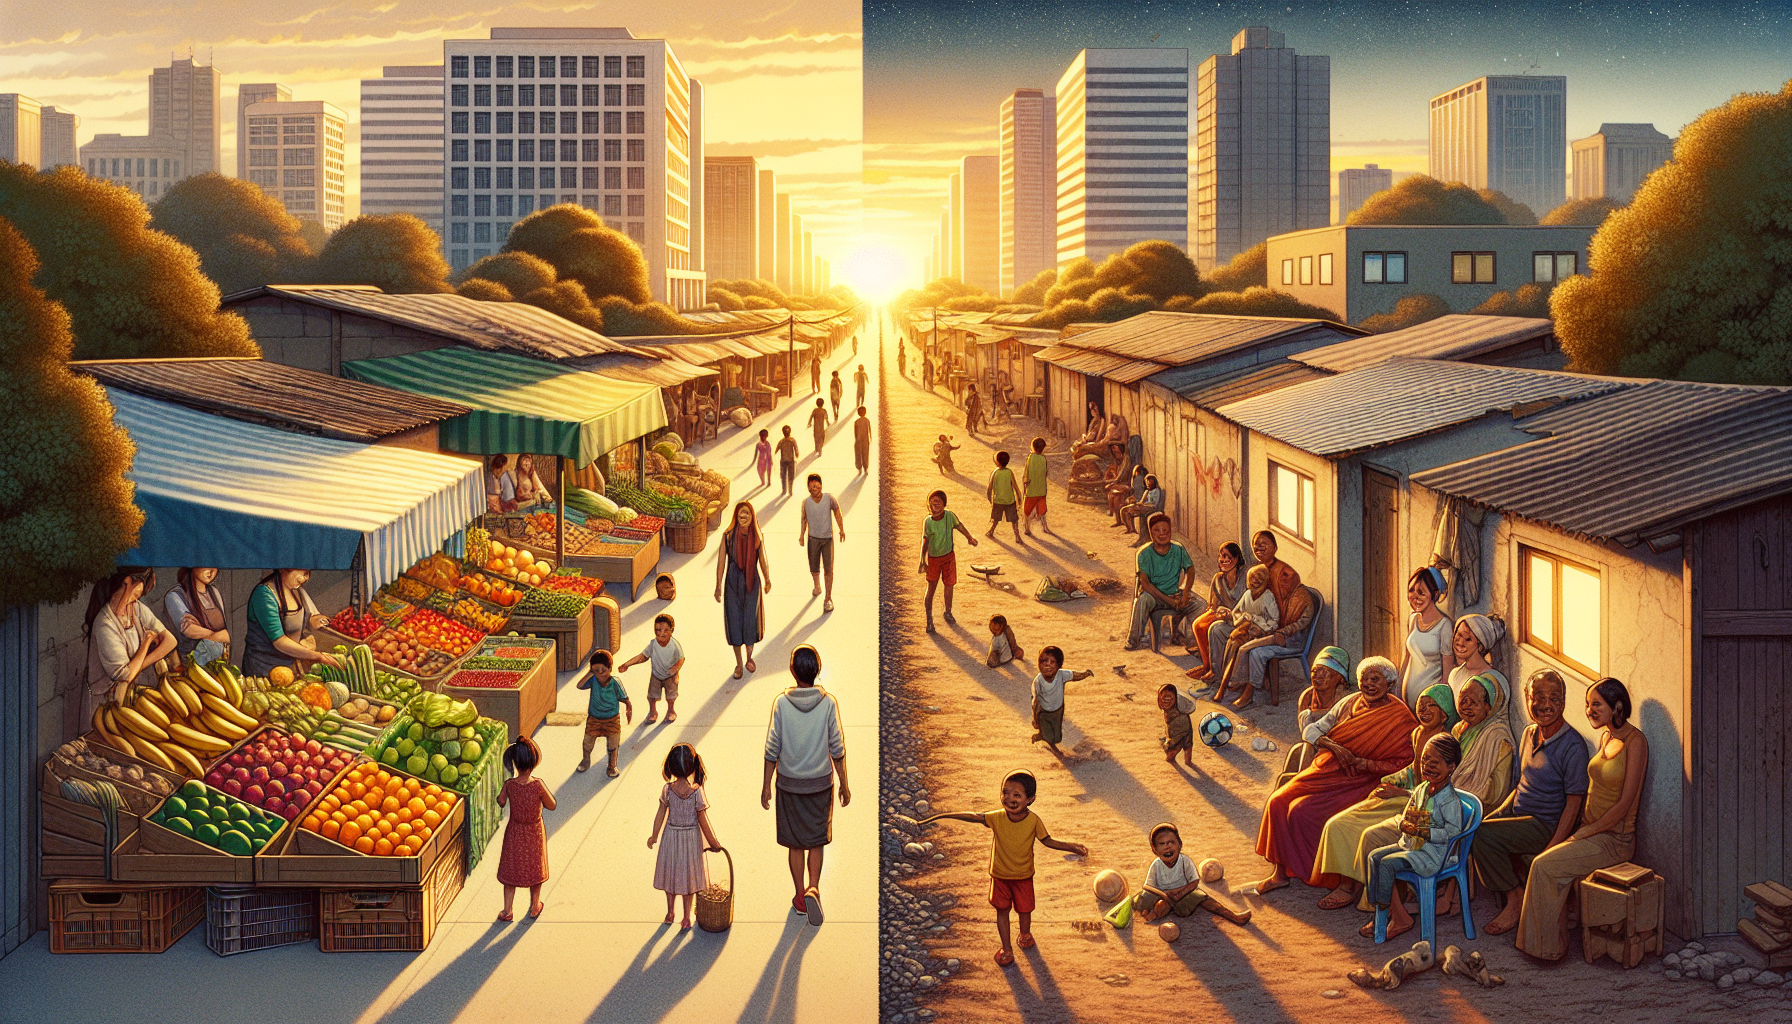
`Image generated by AI`

# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ What is the average life expectancy and GDP in these nations?
+ What is the distribution of those variables?
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [470]:
#Importing initial libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
%matplotlib inline

## Understanding and preparing data

Initially, it wasn't provided any metadata about the dataset, so understanding it first will be a part of the process.

In [471]:
df = pd.read_csv('all_data.csv')
df.head()

Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10

The dataset looks to be informing the Life expectancy at birth (in years) and the GDP for some countries and years. Let's try to know our dataset better.

Which countries do we have in our dataframe?

In [472]:
list(df['Country'].unique())

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

What is the range of time (years) that our dataframe contains for each country?

In [473]:
df.groupby('Country')['Year'].describe()[['count', 'min', 'max']]

count     min     max
Country                                        
Chile                      16.0  2000.0  2015.0
China                      16.0  2000.0  2015.0
Germany                    16.0  2000.0  2015.0
Mexico                     16.0  2000.0  2015.0
United States of America   16.0  2000.0  2015.0
Zimbabwe                   16.0  2000.0  2015.0

In [474]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

With this information, it's possible now to describe better our data:

**Country**: Name of the 6 nations
   - Chile <br>
   - China <br>
   - Germany <br>
   - Mexico <br>
   - United States of America <br>
   - Zimbabwe <br>

**Year**: Varies from 2000 to 2015 <br> <br>
**Life expectancy at birth (years)**: The number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life <br> <br>
**GDP**: Total monetary or market value (in USD) of all the finished goods and services produced within a country's borders in a specific time period.

In [475]:
#Renaming Life Expectancy column
df.rename({'Life expectancy at birth (years)': 'LifeExp'}, axis=1, inplace=True)

In [476]:
df.columns

Index(['Country', 'Year', 'LifeExp', 'GDP'], dtype='object')

In [477]:
#Renaming "United States of America" value, so it gets more concise
df['Country'] = df['Country'].str.replace('United States of America', 'USA')

Before going into the analisys, it's important to check for null values and datatypes

In [478]:
len(df)

96

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LifeExp  96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


As there are no null values in the dataset, the following section will approach de exploratory analysis to answer the proposed questions.

## Exploration and Explanation of the data

#### What is the average life expectancy and GDP in these nations?

In [480]:
#Defining our palette
colors = ['#D53E4F', '#F46D43', '#FDAE61', '#66C2A5', '#3288BD', '#5E4FA2']

In [481]:
LEmeans = df.groupby('Country')['LifeExp'].describe().reset_index()
GDPmeans = df.groupby('Country')['GDP'].describe().reset_index()

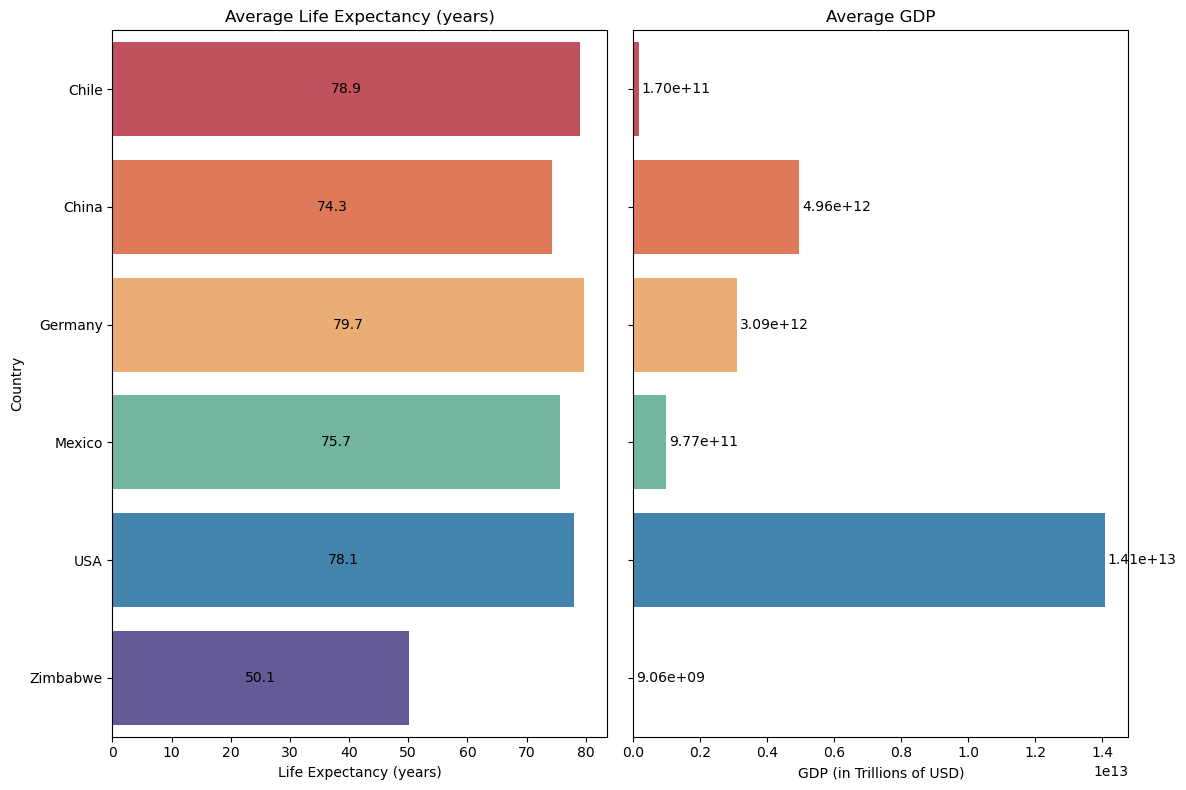

In [482]:
fig , ax = plt.subplots(1, 2, figsize=(12,8), sharey=True)

#LifeExp means plot
sns.barplot(data=LEmeans, y='Country', x='mean', palette=colors, ax=ax[0])
ax[0].set_xlabel('Life Expectancy (years)')
ax[0].set_title('Average Life Expectancy (years)')
ax[0].bar_label(ax[0].containers[0], fmt='%.1f', label_type='center')

#GDP means Plot
sns.barplot(data=GDPmeans, y='Country', x='mean', palette=colors, ax=ax[1])
ax[1].set_xlabel('GDP (in Trillions of USD)')
ax[1].set_ylabel('')
ax[1].set_title('Average GDP')
ax[1].bar_label(ax[1].containers[0], fmt='%.2e', padding=2)

plt.tight_layout()
plt.show()

#### What is the distribution of life expectancy and GDP?

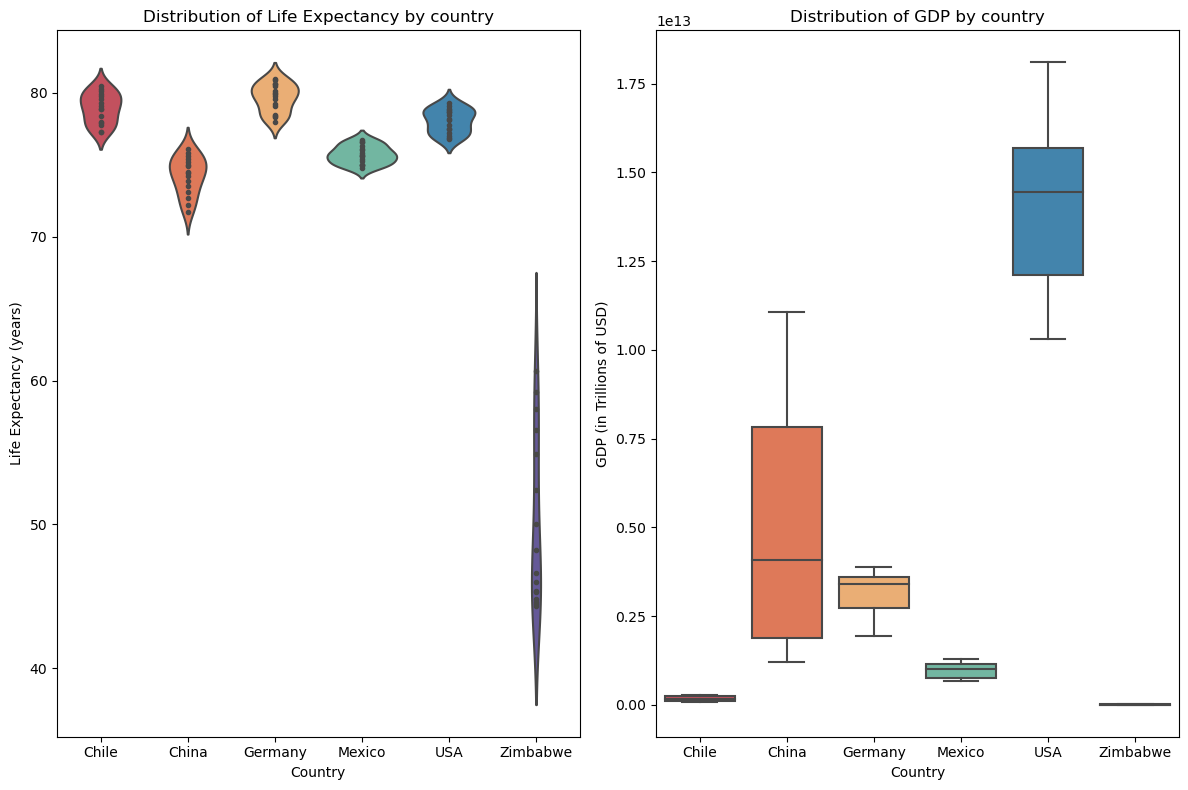

In [483]:
fig , ax = plt.subplots(1, 2, figsize=(12,8))

#LifeExp distribution plot
sns.violinplot(data=df, x='Country', y='LifeExp', palette=colors, inner='point', ax=ax[0])
ax[0].set_ylabel('Life Expectancy (years)')
ax[0].set_title('Distribution of Life Expectancy by country')

#GDP distribution Plot
sns.boxplot(data=df, x='Country', y='GDP', palette=colors, ax=ax[1])
ax[1].set_ylabel('GDP (in Trillions of USD)')
ax[1].set_title('Distribution of GDP by country')

plt.tight_layout()
plt.show()

By the visual shown above, we can see that except for Zimbabwe, all the other for countries have a relatively short spread and left skewed distributions for their Life Expectancy, and also high means (between 74 and 80). As for Zimbabwe it's the complete opposite: the values are consistently lower and have a varied a lot more (std = 5.9) in the studied period.

For GDP, it's possible to see that USA has the higher value, differenciating significantly from the other countries. It's also important to notice that GDP in China varied the most. The trend of those variations will be approached in sequence. It's important to notice that, comparing both plots, it's clear that in the overall scenario, a higher GDP doesn't necessarily mean higher life expectancy, or at least not in the same proportion. One example of that is Chile and Germany having higher logevity means than USA, even though the GDP in those countries is way lower. Later, this correlation will be studied in each countries separate.

#### Has life expectancy increased over time in the six nations?

In [484]:
#Creating a list of subplot position and country that will be used in our figures
countries = df['Country'].unique()
axindex = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

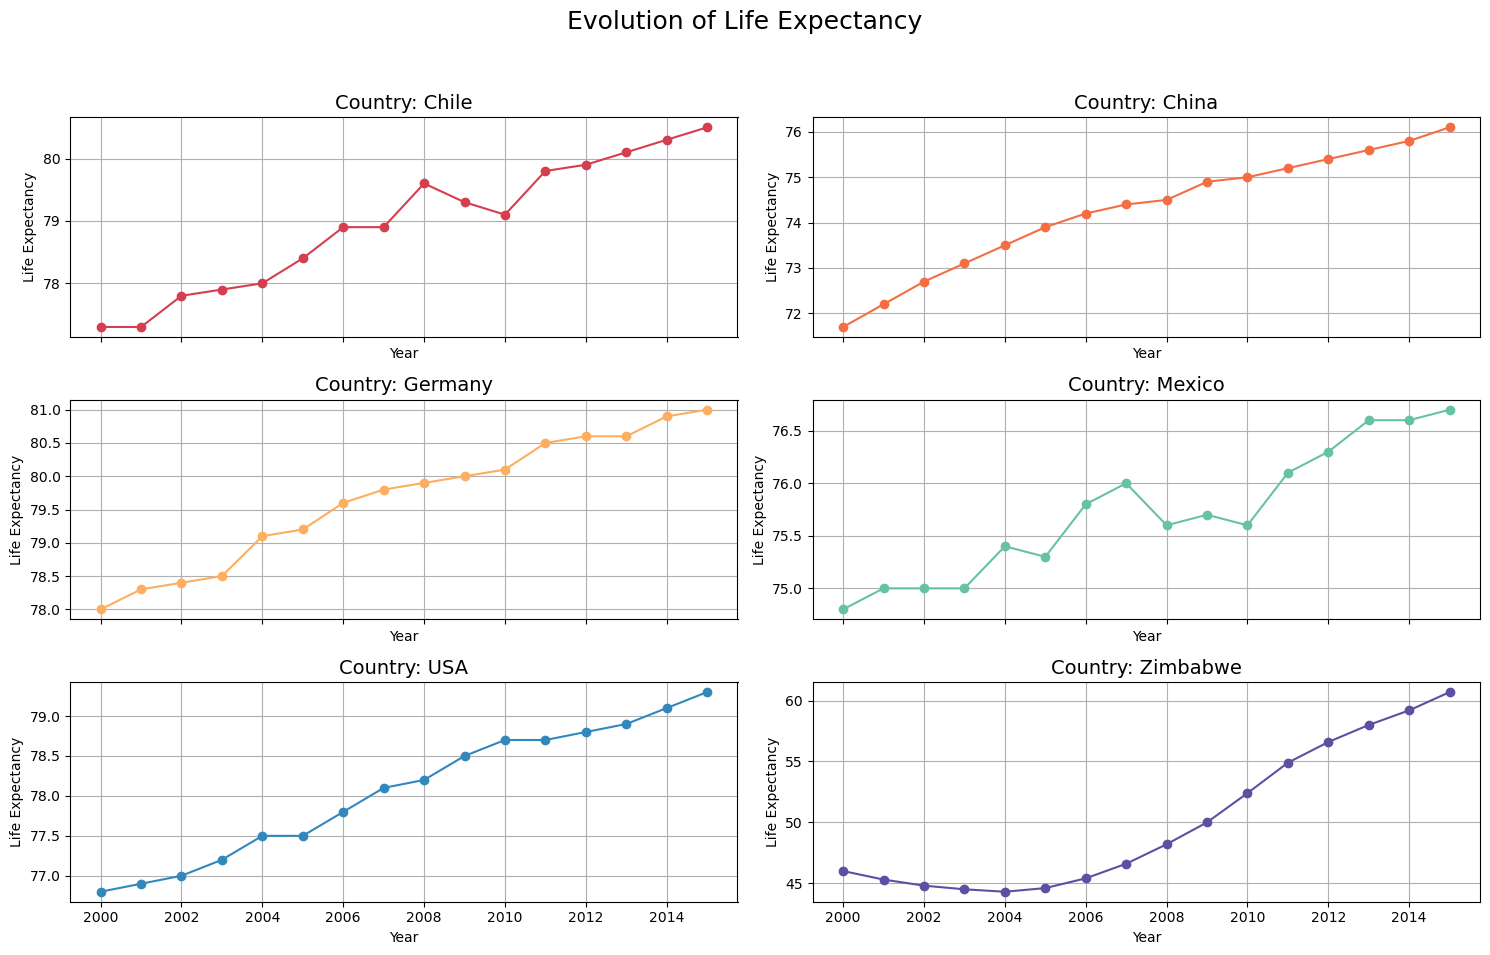

In [485]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10), sharex=True)
fig.suptitle('Evolution of Life Expectancy', fontsize=18)

for i, country, color in zip(axindex, countries, colors):
    ax = axs[i]
    data=df[df['Country']==country]
    ax.plot(data['Year'], data['LifeExp'], marker='o', color=color)
    ax.set_title(f'Country: {country}', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Expectancy')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Has GDP increased over time in the six nations?

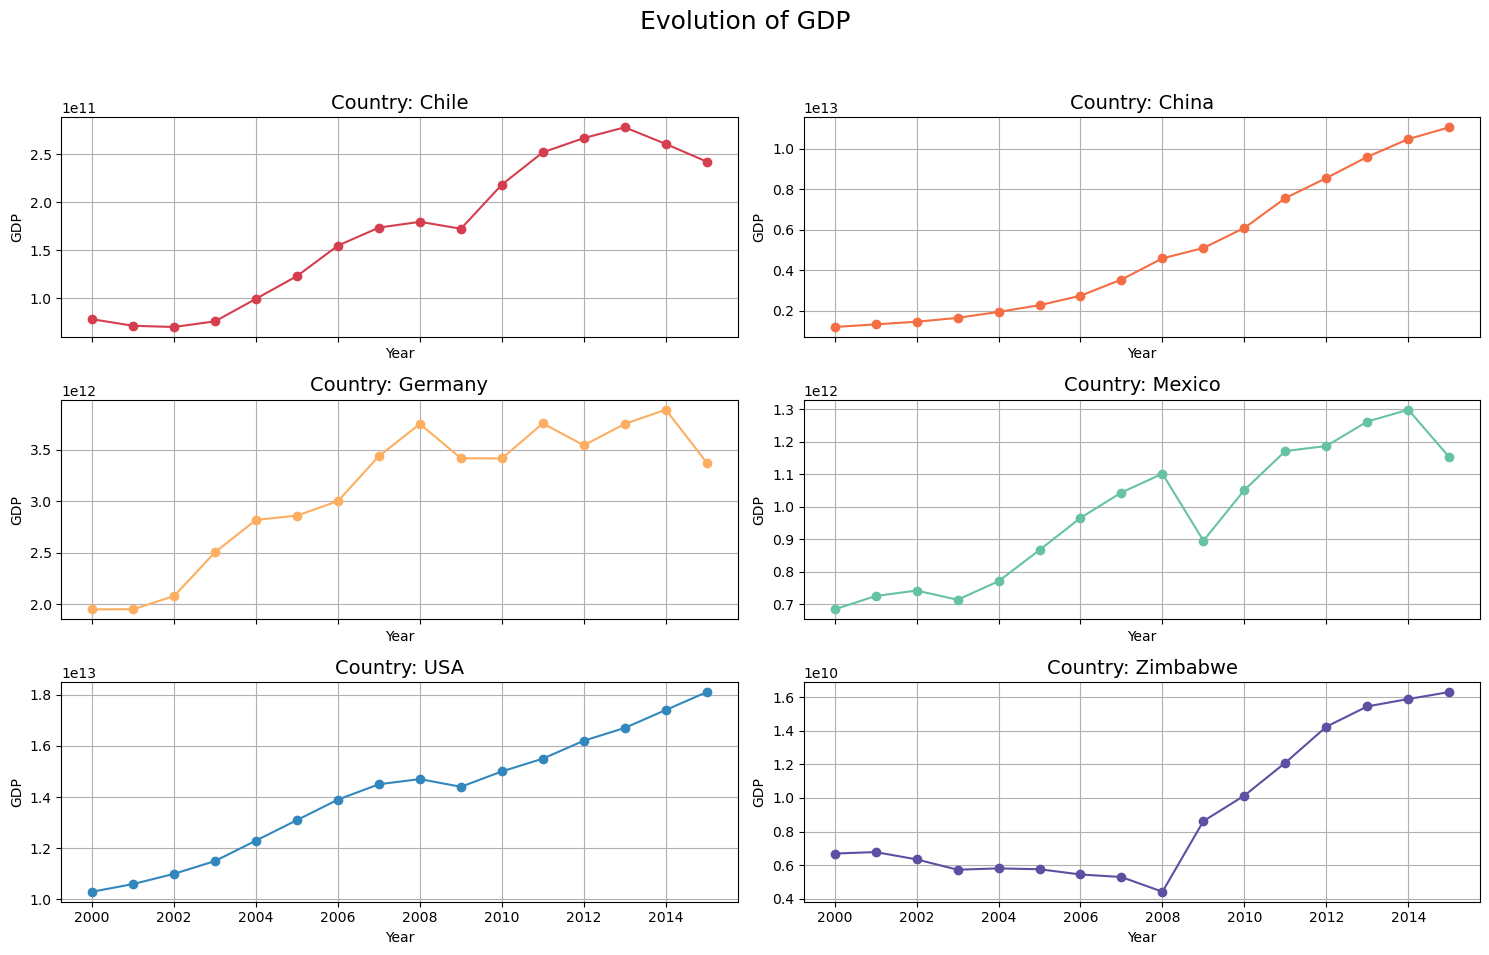

In [486]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10), sharex=True)
fig.suptitle('Evolution of GDP', fontsize=18)

for i, country, color in zip(axindex, countries, colors):
    ax = axs[i]
    data=df[df['Country']==country]
    ax.plot(data['Year'], data['GDP'], marker='o', color=color)
    ax.set_title(f'Country: {country}', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

It is possible to see that in both Life Expectancy and GDP, the general tendency for the countries is the growth in those variables along the time.

However, there is a period between 2000 and 2004 in Zimbabwe where there was a downward trend for Life Expectancy. The same happens for the GDP variable between 2000 and 2008.

Although the visualizations are side-by-side, it's important to notice that they are not in the same scale. The intended focus was to visualize the trend, rather than the absolute values. Below, it's possible to actually visualize the increase magnitude for each country. 

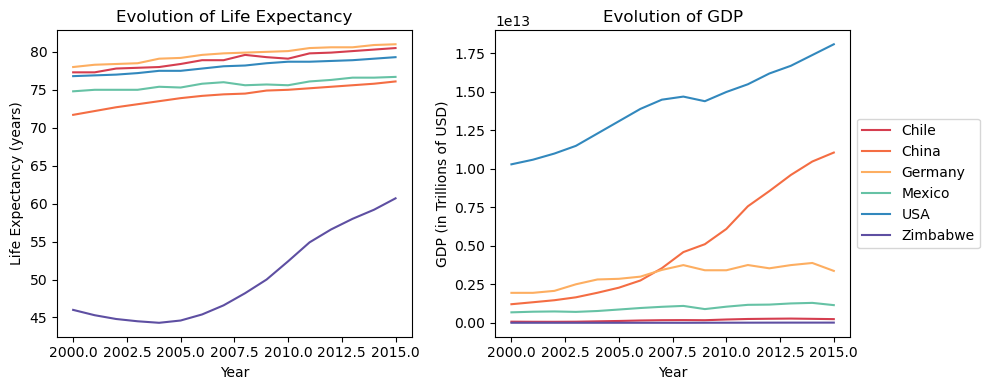

In [487]:
fig , ax = plt.subplots(1, 2, figsize=(10,4))

#LifeExp evolution plot
sns.lineplot(data=df, x='Year', y='LifeExp', hue='Country', palette=colors, legend=False, ax=ax[0])
ax[0].set_ylabel('Life Expectancy (years)')
ax[0].set_title('Evolution of Life Expectancy')

#GDP evolution Plot
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', palette=colors, ax=ax[1])
ax[1].set_ylabel('GDP (in Trillions of USD)')
ax[1].set_title('Evolution of GDP')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.show()

It's possible to conclude that for Life Expectancy, the greater increase occurred in Zimbabwe.

As for GDP, USA and China experienced the most significant gains from 2000 to 2015. During this period, China’s GDP grew from less than a quarter trillion dollars to one trillion dollars. The other countries did not see increases of this magnitude.

## Studying the correlation between Life Expectancy and GDP

This section will approach 2 metrics of correlation to study both Linear and Non-linear relationship between our study variables, considering each country separately.

#### Pearson R (Linear Correlation)

In [488]:
pearson = []
pval = []
for country in countries:
    data=df[df['Country']==country]
    corr, p = pearsonr(data['LifeExp'], data['GDP'])
    pearson.append(corr)
    pval.append(p)

In [489]:
pearsoncorr = pd.DataFrame({'Country': countries,
                            'Pearson Correlation': pearson,
                            'p-value': pval}).set_index('Country')
pearsoncorr

Pearson Correlation       p-value
Country                                    
Chile                0.949877  1.865914e-08
China                0.908526  1.125099e-06
Germany              0.932699  1.401882e-07
Mexico               0.932238  1.468696e-07
USA                  0.981709  1.749971e-11
Zimbabwe             0.966200  1.235852e-09

#### Spearman R (Non-linear Correlation)

In [490]:
spearman = []
pval2 = []
for country in countries:
    data=df[df['Country']==country]
    corr, p = spearmanr(data['LifeExp'], data['GDP'])
    spearman.append(corr)
    pval2.append(p)

In [491]:
spearmancorr = pd.DataFrame({'Country': countries,
                            'Spearman Correlation': spearman,
                            'p-value': pval2}).set_index('Country')
spearmancorr

Spearman Correlation       p-value
Country                                     
Chile                 0.927836  2.254730e-07
China                 1.000000  0.000000e+00
Germany               0.844739  3.828534e-05
Mexico                0.918768  5.038112e-07
USA                   0.989692  3.227324e-13
Zimbabwe              0.752941  7.610811e-04

As we can see, the both correlation metrics showed a pretty strong connection between GDP and Life Expectancy. Let's plot it to better visualize.

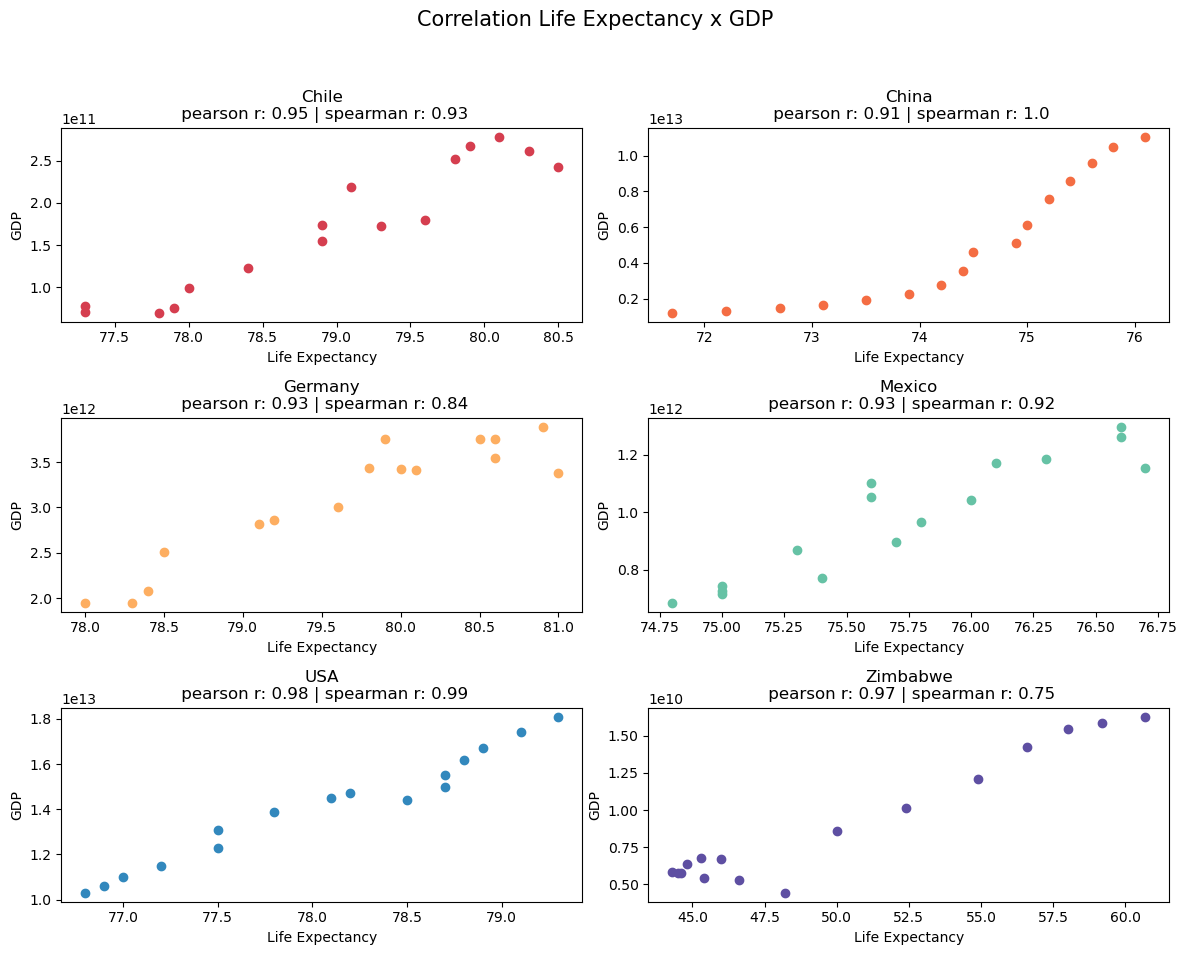

In [492]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Correlation Life Expectancy x GDP', fontsize=15)

for i, country, color, pr, sr in zip(axindex, countries, colors, pearson, spearman):
    ax = axs[i]
    data=df[df['Country']==country]
    ax.scatter(data['LifeExp'], data['GDP'], marker='o', color=color)
    ax.set_title(f'{country}\n pearson r: {round(pr,2)} | spearman r: {round(sr,2)}', fontsize=12)
    ax.set_xlabel('Life Expectancy')
    ax.set_ylabel('GDP')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Conclusions

This study examined the relationship between Gross Domestic Product (GDP) and Life Expectancy in six different countries from 2000 to 2015. The results enabled an understanding of the absolute differences in these variables between the countries, as well as its variation over the studied period. Notably, Zimbabwe had a significantly lower average Life Expectancy compared to the other countries, and a greater variation. Current rankings show that Zimbabwe is among the lowest of the 193 countries. External research attributes this to the country's historical political and economic crises, as well as the high percentage of the population involved in agriculture and the elevated number of dependents per capita.

Furthermore, this study concludes that the general trend of Life Expectancy and GDP in the six studied countries was one of growth over the period. A notable exception is Zimbabwe, which experienced a declining GDP trend from 2000 to 2008 due to political and economic crises during that time. Only after this period did the situation reverse, and the country began to see an increase in its GDP.

Finally, the relationship between GDP and Life Expectancy variables was examined in these countries. Pearson's correlation coefficient (to understand the linear correlation) and Spearman's rank correlation coefficient (to understand the monotonic, or non-linear, correlation) were utilized. In all countries, the results showed a strong correlation between GDP and Life Expectancy. However, this study alone cannot infer causality between the variables. To determine causality, planned experiments would be required. Nonetheless, various scientific studies suggest that GDP can indeed increase Life Expectancy by boosting a country's economic growth and development, thereby leading to longer longevity.

# References

**CodeAcademy** (providers of this challenge): www.codecademy.com

Miladinov, G. Socioeconomic development and life expectancy relationship: evidence from the EU accession candidate countries. **Genus** 76, 2 (2020). https://doi.org/10.1186/s41118-019-0071-0

Murwirapachena, G.; Mlambo, C. Life Expectancy In Zimbabwe: An Analysis Of Five Decades. **International Business & Economics Research Journal (IBER)** 14, 3 (2015). https://doi.org/10.19030/iber.v14i3.9207
April 2015